Student: Tianhui Zhao

UID: 505 493 240

Lecture: ECON 441B

Instructor: Samuel Borghese

Due Date: Jan 12, 2024

In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
# Check data
data.head()

# Drop NA
data.dropna(inplace=True)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [5]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [8]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [9]:
model1 = sm.OLS(y_in,X_in).fit()

# 4.) Recreate the graph for your model

In [10]:
import matplotlib.pyplot as plt

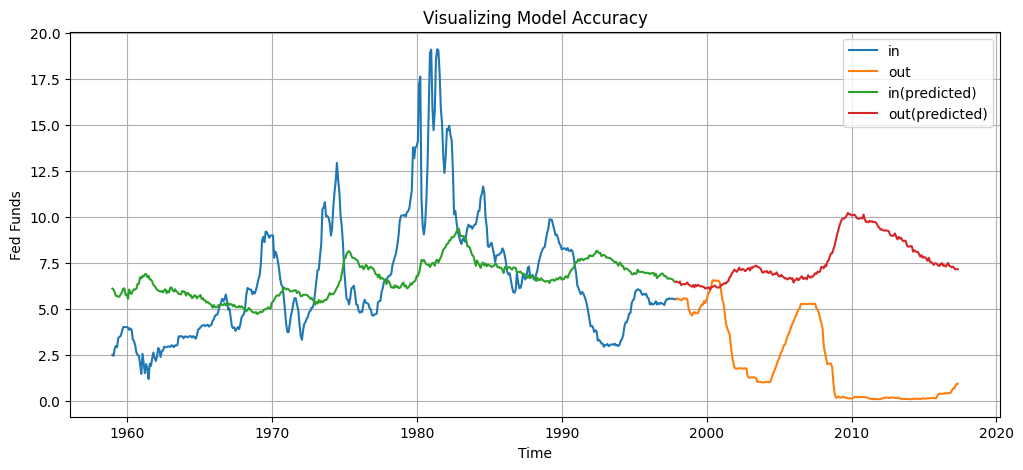

In [17]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in, label = "in")
plt.plot(y_out, label = "out")
plt.plot(model1.predict(X_in), label = "in(predicted)")
plt.plot(model1.predict(X_out), label = "out(predicted)")
#plt.plot(model1.predict(X_hold), label = "hold")

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend()
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [19]:
from sklearn.metrics import mean_squared_error

In [24]:
in_mse_1 = mean_squared_error(y_in,model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [25]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566811


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
max_degrees = 3

DEGREEs:  1


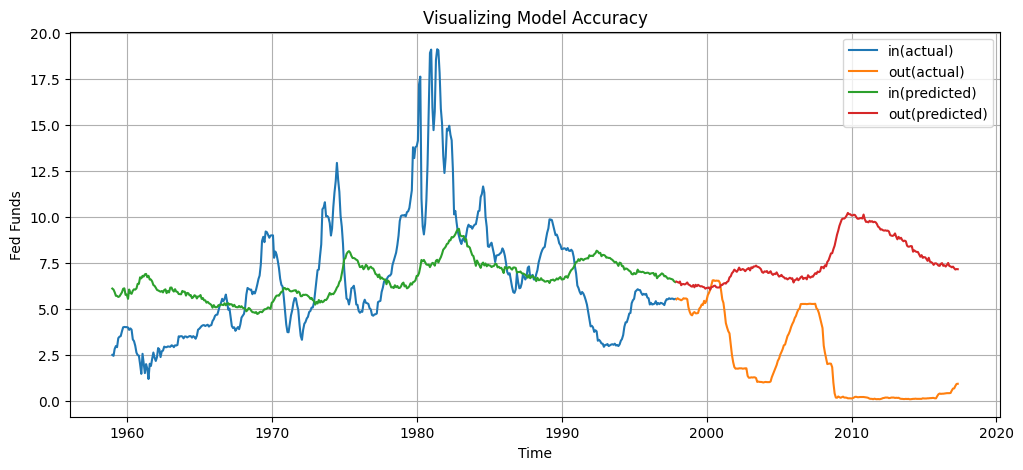

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566613
_______________________________________________
_______________________________________________
DEGREEs:  2


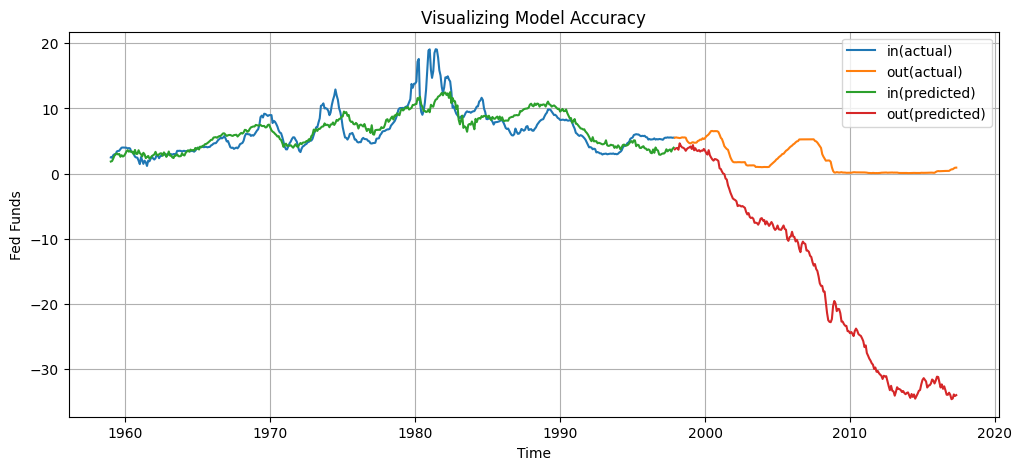

Insample MSE :  3.863477139276067
Outsample MSE :  481.4465098814669
_______________________________________________
_______________________________________________
DEGREEs:  3


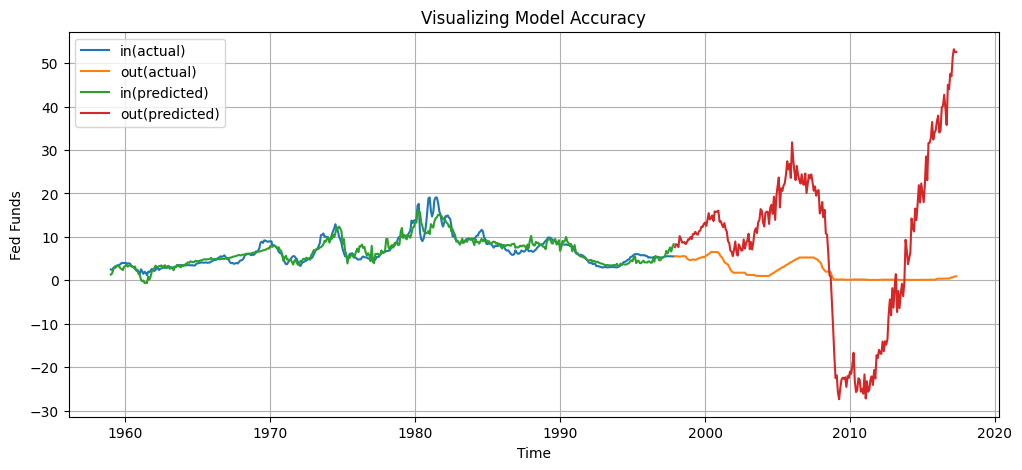

Insample MSE :  1.8723636266720678
Outsample MSE :  371.7680451137081
_______________________________________________
_______________________________________________


In [31]:
for degrees in range(1, max_degrees+1):
    print("DEGREEs: ", degrees)
    
    poly = PolynomialFeatures(degree=degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    # Q3) Model
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    # Q4) Graph
    plt.figure(figsize = (12,5))

    # Add index for predicted results
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)

    plt.plot(y_in, label = "in(actual)")
    plt.plot(y_out, label = "out(actual)")
    plt.plot(in_preds, label = "in(predicted)")
    plt.plot(out_preds, label = "out(predicted)")
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Q5) MSE
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("_______________________________________________")
    print("_______________________________________________")
    
    

# 7.) State your observations :

The more complex and power our model develops (linear -- quadtratic -- cubic), the less insample MSE it obtains. Meanwhile, however, larger outsample MSE follows and they may be much more times the insample MSE as power increases. 

Therefore, as models become more flexible (*higher polynomial in this case*), it also becomes overfitting, which means model captures too much patterns in the training set (*in sample*) while is not general enough to apply to test set (*out sample*), leading to significant outsample MSE.